In [1]:
!pip install opencv-python
!pip install ultralytics opencv-python

!pip install cv2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.1 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


###

In [7]:
# URLs for YOLOv3 files
import os
import sys
import requests
import urllib.request
urls = {
  'yolov3.weights': 'https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov3.weights',
  'yolov3.cfg': 'https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg',
  'coco.names': 'https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names'
}

# Create directory for model files
os.makedirs('yolo_files', exist_ok=True)

# Download each file if it doesn't exist
for filename, url in urls.items():
  filepath = os.path.join('yolo_files', filename)
  if not os.path.exists(filepath):
      print(f"Downloading {filename}...")
      try:
          urllib.request.urlretrieve(url, filepath)
          print(f"Successfully downloaded {filename}")
      except Exception as e:
          print(f"Error downloading {filename}: {e}")
          print(f"Please download manually from: {url}")
          sys.exit(1)
  else:
      print(f"{filename} already exists")


Successfully downloaded yolov3.weights
Successfully downloaded yolov3.cfg
Successfully downloaded coco.names


In [8]:
import cv2
net = cv2.dnn.readNet("/content/yolo_files/yolov3.weights", "/content/yolo_files/yolov3.cfg")

In [9]:

import numpy as np
from google.colab.patches import cv2_imshow
classes=[]
with open("/content/yolo_files/coco.names", "r") as f:
    for line in f:
        classes.append(line.strip())

print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [18]:

layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

colors = np.random.uniform(0, 255, size=(len(classes), 3))

img = cv2.imread("WhatsApp Image 2025-08-28 at 16.56.05_e976ebd0.jpg")
img = cv2.resize(img, None, fx=0.6, fy=0.6)
height, width, channels = img.shape
blob = cv2.dnn.blobFromImage(img, scalefactor=1/255.0, size=(416, 416), swapRB=True)
net.setInput(blob)
outs = net.forward(output_layers)
display(blob)

array([[[[0.8470589 , 0.8470589 , 0.8470589 , ..., 0.454902  ,
          0.454902  , 0.44705886],
         [0.8470589 , 0.8470589 , 0.8470589 , ..., 0.454902  ,
          0.45882356, 0.45098042],
         [0.8470589 , 0.8470589 , 0.8470589 , ..., 0.47058827,
          0.47450984, 0.4666667 ],
         ...,
         [0.7607844 , 0.70980394, 0.62352943, ..., 0.7058824 ,
          0.6509804 , 0.5803922 ],
         [0.7607844 , 0.73333335, 0.64705884, ..., 0.72156864,
          0.68235296, 0.6509804 ],
         [0.7568628 , 0.7294118 , 0.6392157 , ..., 0.7176471 ,
          0.6666667 , 0.6745098 ]],

        [[0.8941177 , 0.8941177 , 0.8941177 , ..., 0.4784314 ,
          0.4784314 , 0.47058827],
         [0.8941177 , 0.8941177 , 0.8941177 , ..., 0.4784314 ,
          0.48235297, 0.47450984],
         [0.8941177 , 0.8941177 , 0.8941177 , ..., 0.49411768,
          0.49803925, 0.4901961 ],
         ...,
         [0.7843138 , 0.7411765 , 0.6627451 , ..., 0.7411765 ,
          0.6901961 , 0.6

In [19]:
class_ids , confidences,box = [],[],[]
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = np.max( scores)

        if confidence > 0.5000:

            centx=int(detection[0]*width)
            centy=int(detection[1]*height)
            w=int(detection[2]*width)
            h=int(detection[3]*height)

            x=int(centx-w/2)
            y=int(centy-h/2)

            box.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(box, confidences, score_threshold=0.5, nms_threshold=0.4)


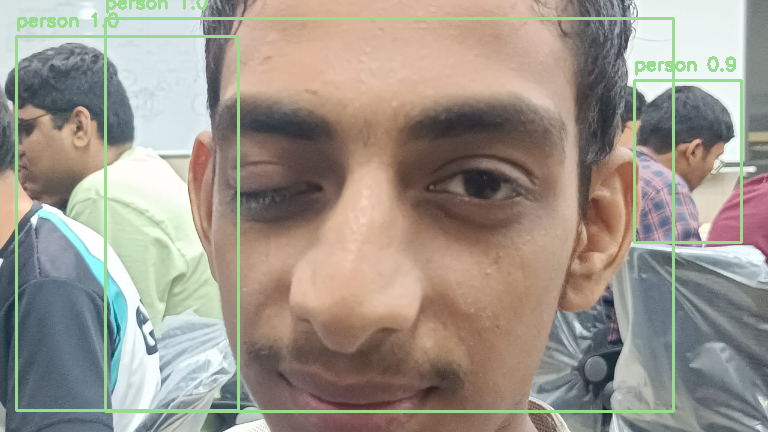

In [21]:

font = cv2.FONT_HERSHEY_SIMPLEX
for i in range(len(box)):
    if i in indexes:
        x, y, w, h = box[i]
        label = str(classes[class_ids[i]])
        confidence = confidences[i]
        color = colors[class_ids[i]]

        cv2.rectangle(img, (x, y), (x+w,y+h),color,1)
        cv2.putText(img, f"{label} {confidence:.1f}", (x,y-10),font,0.6,color,1)

# Show final image
cv2_imshow(img)


### question 1)When would grayscaling be a bad idea? Name a detection task where color is the most important feature. (e.g., identifying traffic light status, sorting ripe vs. unripe fruit).


###ans1) Grayscaling would be bad if colours is very important, prominet freatures for classification for example if we are building a self driving car than we need to identify the traffic signal and for which colour is an very inmportant factor than grayscaling is bad. so in this task colour is most important feature

### question 2) What is the trade-off of resizing? If you shrink an image of a crowded street too much to make it faster, what critical information might you lose?


### ans2) Resizing an image down makes the compuation faster because there will be few pixels to precess. However, the tradeoff is by reducing resulotion ,img may lost key information about smaller or distant objects, which may inportant for the task you are doing like incase of facial detection resizing it may cause failur and decrese accuracy

### question3)Blurring intentionally destroys information. Imagine you are building a system to read license plates from a security camera. How could blurring be helpful? How could it be harmful if you apply too much?


### answer3) Blurring is used to reduce the noises and simplifying the image, such as minor imperfections on the plate or variations in lighting, which can sometimes interfere with the recognition algorithm.but,applying too much blurring can be harmful because it can destroy the fine details of the license plate cers themselves.